In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from google.colab import files
import pickle
import os

!pip install scipy
import scipy.stats as stats

!pip install --upgrade autoviz
from autoviz.AutoViz_Class import AutoViz_Class

warnings.filterwarnings("ignore")
%matplotlib inline

In [10]:
BG_BLACK = "\033[40m"
BG_RED = "\033[41m"
BG_GREEN = "\033[42m"
BG_YELLOW = "\033[43m"
BG_BLUE = "\033[44m"
BG_MAGENTA = "\033[45m"
BG_CYAN = "\033[46m"
BG_WHITE = "\033[47m"
BG_DARK_GRAY = "\033[100m"
BG_BRIGHT_RED = "\033[101m"
BG_BRIGHT_GREEN = "\033[102m"
BG_BRIGHT_YELLOW = "\033[103m"
BG_BRIGHT_BLUE = "\033[104m"
BG_BRIGHT_MAGENTA = "\033[105m"
BG_BRIGHT_CYAN = "\033[106m"
BG_WHITE = "\033[107m"
RESET = "\033[0m" # Reset all formatting

In [11]:
np.random.seed(31071967)

In [12]:
run_autoviz = False

In [13]:
# #import os, pathlib, sys

# path = "/content/load_default_clean.pkl"   # אותו נתיב שהשתמשת בו
# print("קיים?", os.path.exists(path))
# print("גודל (בתים):", os.path.getsize(path) if os.path.exists(path) else "אין קובץ")


In [34]:
import os, pathlib, sys
!mkdir -p pickles
pickle_file = '/content/pickles/load_default_clean.pkl'

if not os.path.exists(pickle_file):
# Upload file
  uploaded = files.upload()

# Read pickle into DataFrame
df = pd.read_pickle(pickle_file)

df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
1,545583,2500,2500,2500,36 months,13.98,85,4.0,RENT,20004,Not Verified,other,MI,19.86,0,5,7,0,981,21.3,10,3075,3075,2500,575,91,0,2010,7,2005,8,2013,7,2016,6
2,532101,5000,5000,5000,36 months,15.95,176,4.0,RENT,59000,Not Verified,debt_consolidation,NY,19.57,0,1,7,0,18773,99.9,15,2949,2949,1909,874,176,1,2010,6,1994,4,2011,11,2012,3
3,877788,7000,7000,7000,36 months,9.91,226,10.0,MORTGAGE,53796,Not Verified,other,TX,10.80,3,3,7,0,3269,47.2,20,8082,8082,7000,1082,1550,0,2011,9,1998,3,2014,3,2014,3
4,875406,2000,2000,2000,36 months,5.42,60,10.0,RENT,30000,Not Verified,debt_consolidation,NY,3.60,0,0,7,0,0,0.0,15,2162,2162,2000,162,53,0,2011,9,1975,1,2014,2,2016,6
5,506439,3600,3600,3600,36 months,10.25,117,10.0,MORTGAGE,675048,Not Verified,other,AL,1.55,0,4,8,0,0,0.0,25,4206,4206,3600,606,147,0,2010,4,1998,4,2013,5,2016,6


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38478 entries, 1 to 38479
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        38478 non-null  int64   
 1   loan_amnt                 38478 non-null  Int64   
 2   funded_amnt               38478 non-null  Int64   
 3   funded_amnt_inv           38478 non-null  Int64   
 4   term                      38478 non-null  category
 5   int_rate                  38478 non-null  float64 
 6   installment               38478 non-null  Int64   
 7   emp_length                37485 non-null  category
 8   home_ownership            38478 non-null  category
 9   annual_inc                38477 non-null  Int64   
 10  verification_status       38478 non-null  category
 11  purpose                   38478 non-null  category
 12  addr_state                38478 non-null  category
 13  dti                       38478 non-null  float64 


In [16]:
unique_id_cols = ['id']
#1
dup_cols       = []
#0
large_cat_cols = []
#0
small_cat_cols = ['term','emp_length','home_ownership','verification_status','purpose','addr_state']
#6
cont_cols      = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc',
                  'revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt','pub_rec'] #,'months_between_earliest_to_issue']
#19
date_cols      = ['issue_d_year','issue_d_month','earliest_cr_line_year','earliest_cr_line_month','last_pymnt_d_year','last_pymnt_d_month','last_credit_pull_d_year','last_credit_pull_d_month']
#8
cat_cols       = large_cat_cols + small_cat_cols
y_col          = ['repay_fail']
#1
MERGE_ID_COL   = 'id' # if we'll need to merge pickels later
x_cols             = cont_cols + date_cols


AUTOVIZ for continuous variables

In [17]:
!pip install autoviz

from autoviz.AutoViz_Class import AutoViz_Class
cols = [c for c in cont_cols if c in df.columns]
target = 'repay_fail'  # אם אין לך יעד, שימי None
if target in df.columns and target not in cols:
    cols += [target]

df_sub = df[cols].copy()

# --- תיקון NA/טיפוסים לפני AutoViz ---

# 1) להחליף pd.NA ב-np.nan
df_sub = df_sub.replace({pd.NA: np.nan})

# 2) להמיר עמודות nullable לטיפוסים רגילים
bool_cols  = df_sub.select_dtypes(include=['boolean']).columns
intN_cols  = df_sub.select_dtypes(include=['Int64', 'UInt64']).columns

df_sub[bool_cols] = df_sub[bool_cols].astype('float')   # או .astype('int') אם אין NaN
df_sub[intN_cols] = df_sub[intN_cols].astype('float')   # float כדי לאפשר NaN

# 3) לנקות אינסופים
df_sub = df_sub.replace([np.inf, -np.inf], np.nan)

# (אופציונלי) אם יש המון NaN בעמודה – אפשר להשלימם או להשמיט עמודות ריקות לגמרי
# df_sub = df_sub.dropna(axis=1, how='all')

# --- הרצת AutoViz על DataFrame ---
AV = AutoViz_Class()
_ = AV.AutoViz(
    filename="",                  # ריק כשמעבירים DataFrame
    dfte=df_sub,                  # ה-DataFrame לאחר ניקוי
    depVar=target if target in df_sub.columns else None,
    header=0,
    sep=",",
    verbose=2,
    chart_format="inline",
    max_rows_analyzed=len(df_sub),
    max_cols_analyzed=len(df_sub.columns),
    save_plot_dir=None
)



Output hidden; open in https://colab.research.google.com to view.

אין התפלגות נורמאלית חד משמעית בעמודות רציפות

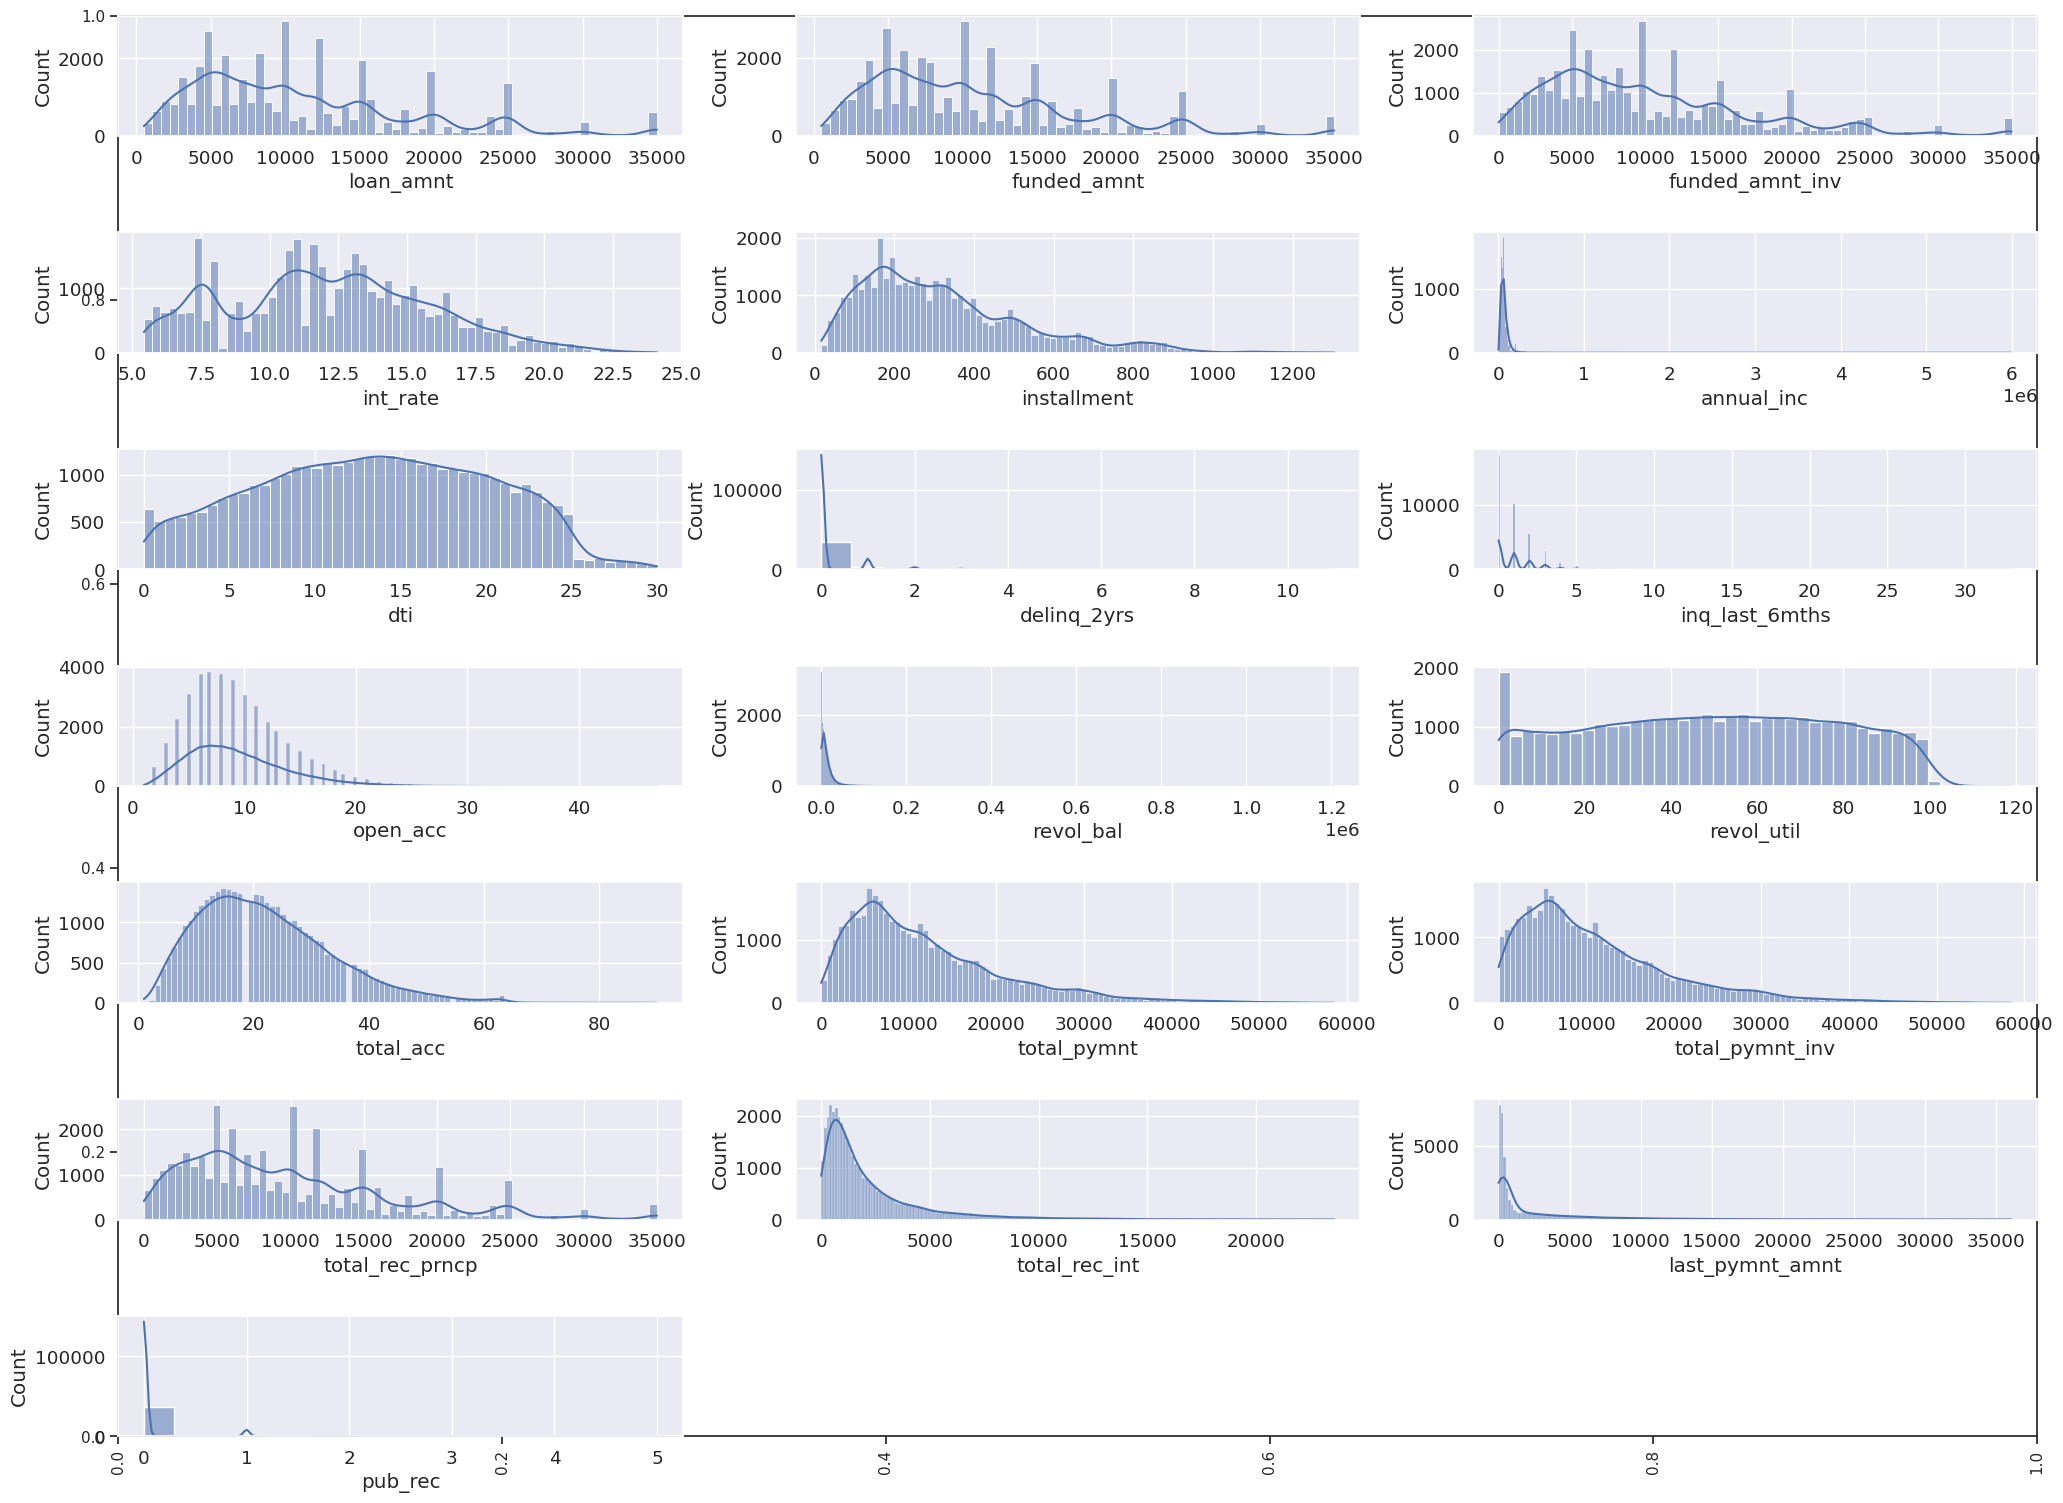

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# plot values
plot_columns = 3
plot_rows = (len(cont_cols)//plot_columns) + len(cont_cols)%plot_columns

fig = plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace=0.8)
plt.xticks(rotation=90, ha='center')  # אחרי הקריאה ל-sns.barplot/plt.bar
plt.tight_layout()
sns.set(font_scale=1.2)

for plot_counter, col in enumerate(cont_cols, start=1):
    plt.subplot(plot_rows, plot_columns, plot_counter)
    sns.histplot(x=col, data=df, kde=True)

plt.show()

# Skewness, Boxplots

In [19]:
# Reset counts before applying the function
normal_distributions = 0
other_distributions = 0

def highlight_distribution_type(cell_value):

    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'

    global normal_distributions, other_distributions

    if cell_value > 1:
        other_distributions += 1
        return highlight
    elif cell_value < -1:
        other_distributions += 1
        return negative
    else:
        normal_distributions += 1
        return default

display( pd.DataFrame(df[y_col+cont_cols].skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight_distribution_type) )

print(f'Normal distributions: {normal_distributions}')
print(f'Other distributions: {other_distributions}')

,skewness
annual_inc,30.556240
revol_bal,11.258751
delinq_2yrs,5.143597
pub_rec,4.665772
inq_last_6mths,3.535817
last_pymnt_amnt,2.747083
total_rec_int,2.701486
repay_fail,1.944495
total_pymnt_inv,1.362456
total_pymnt,1.347666


Normal distributions: 4
Other distributions: 16


Strong right-skew in many features: annual_inc (-30.6)
, revol_bal (~11.3), delinq_2yrs, pub_rec, inq_last_6mths, last_pymnt_amnt, total_rec_int, total_pymnt(_inv), installment, etc. → many small values with a few very large outliers.

Near-symmetric / roughly normal: int_rate (-0.23). open_acc/total_acc (~0.8) are borderline.

Slight left-skew / near-symmetric: dti (−0.03), revol_util (~−0.04).

Target imbalance: repay_fail skew ≈ 1.94 indicates minority positives.

Bottom line: Few “normal” variables (4) vs many non-normal (16).

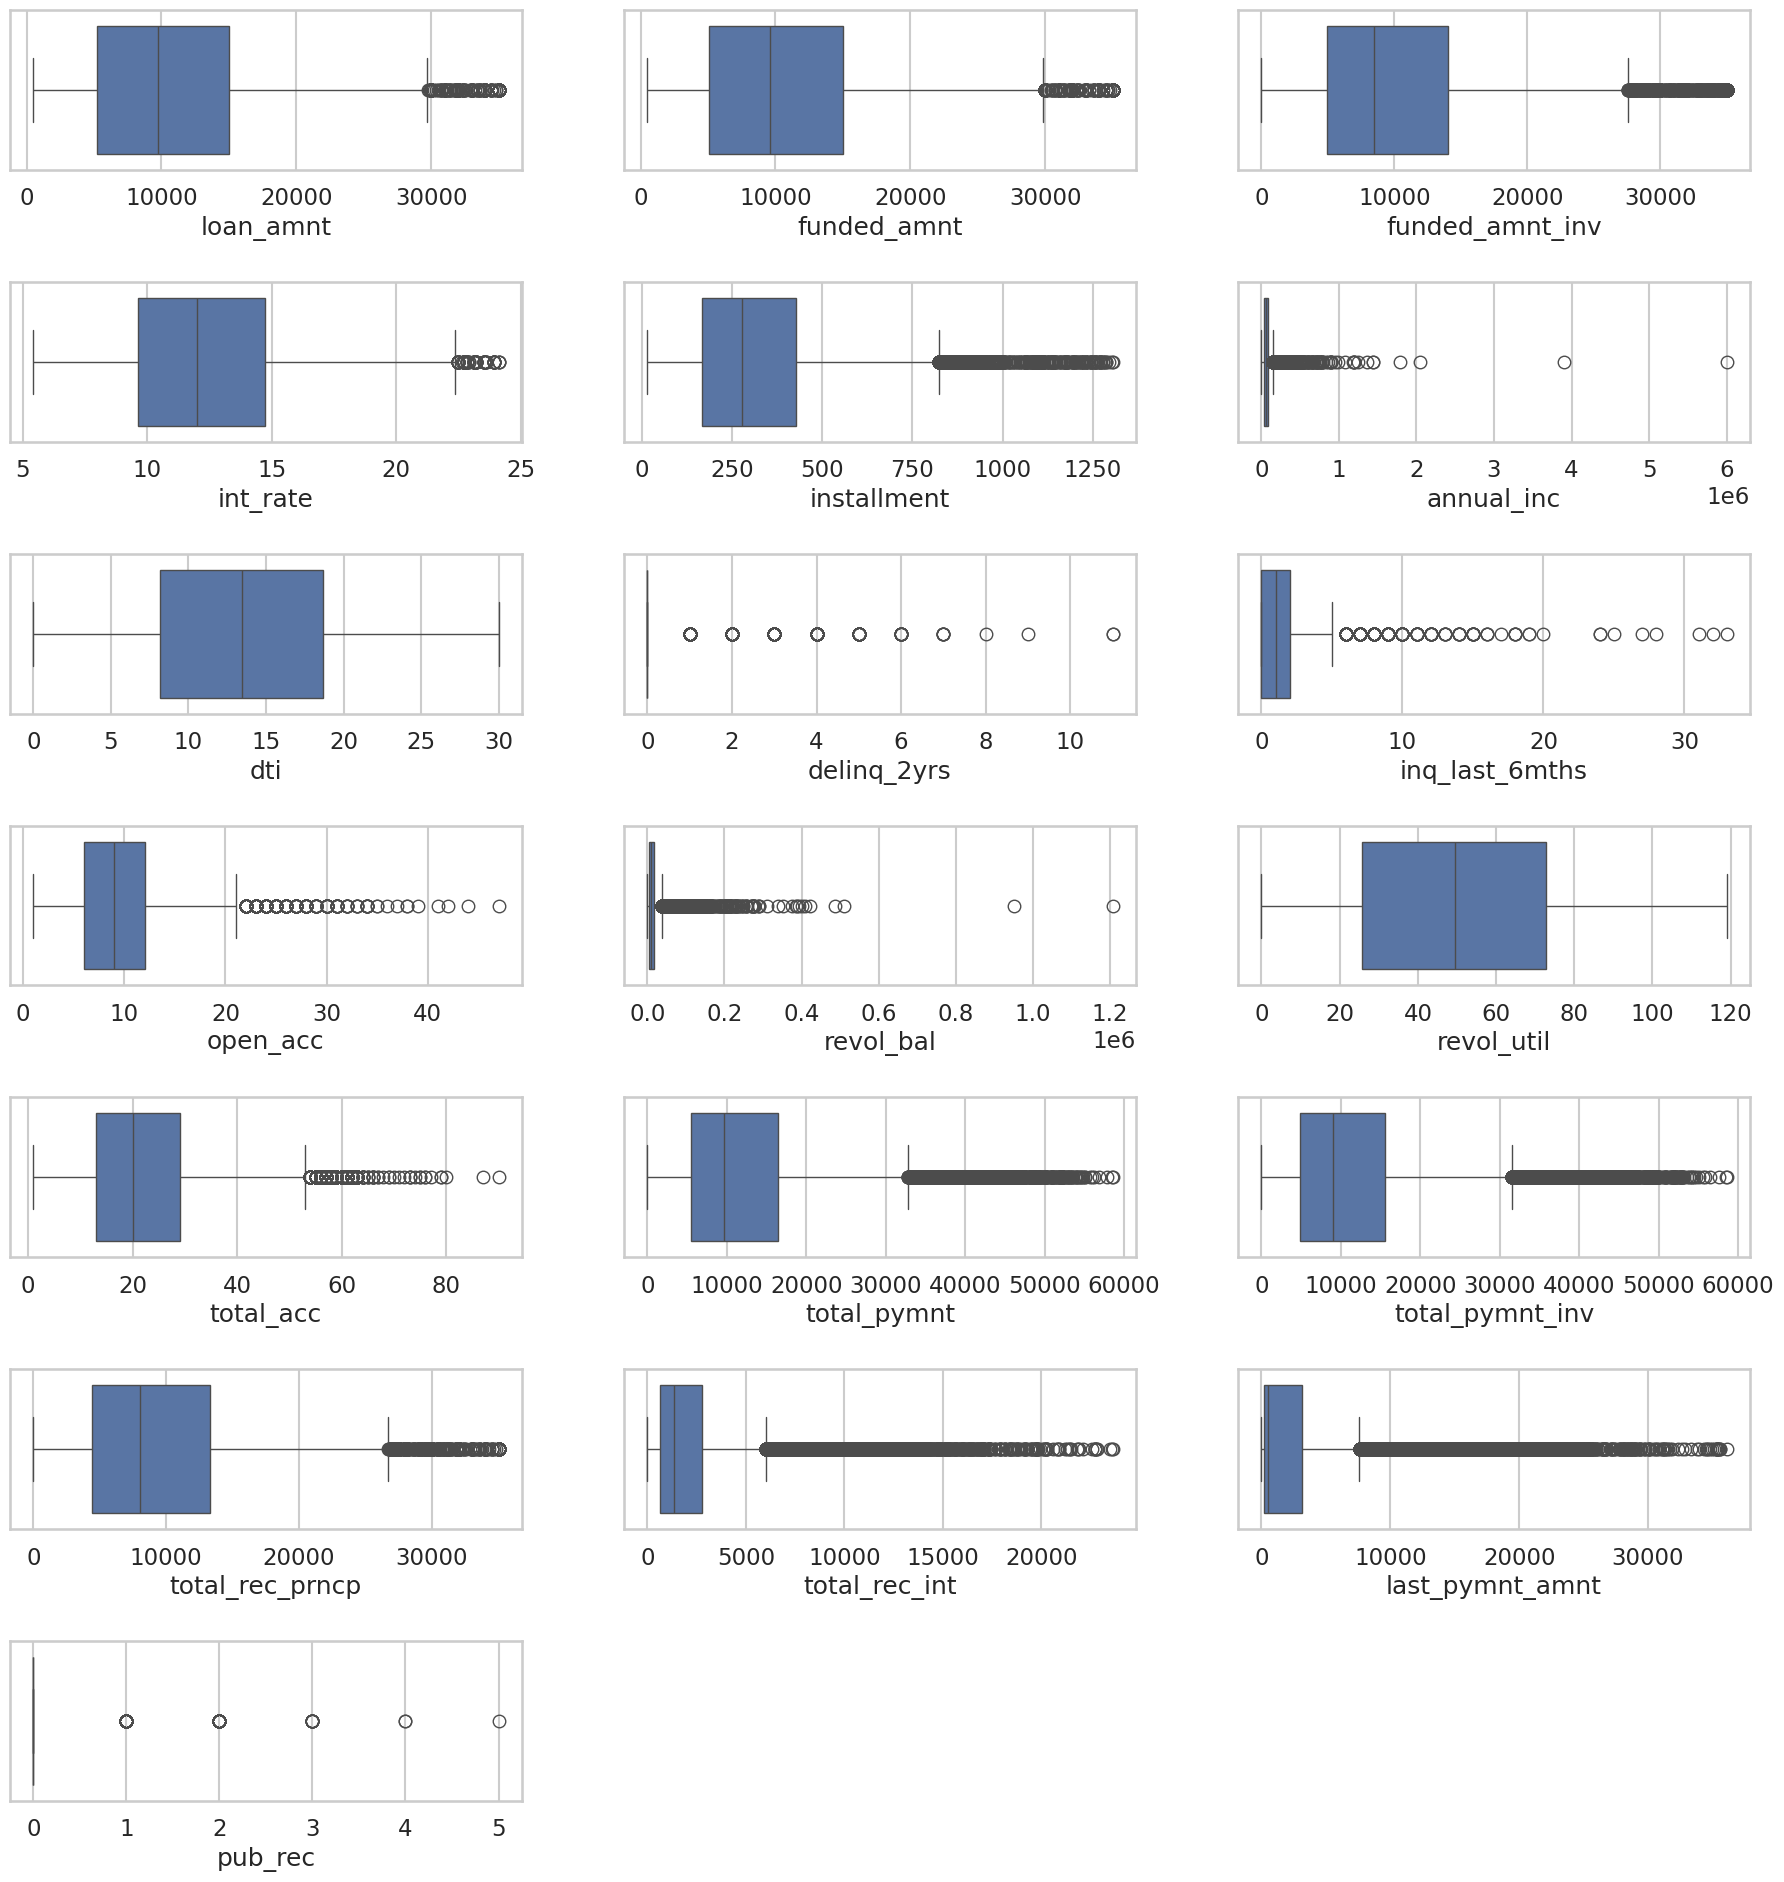

In [35]:
## boxplots
## boxplots

cols_to_plot = cont_cols

plt.figure(figsize=(20,200))
for plot_counter, col in enumerate(cols_to_plot, start=1):
  ax = plt.subplot(60, 3, plot_counter)
  sb.boxplot(data=df, x=col, ax=ax)
  plt.subplots_adjust(hspace = 0.7)

plt.show()

In [21]:

def tail_report(df, cols, target='repay_fail', upper_q=0.99, lower_q=0.01):
    rows = []
    for c in cols:
        x = pd.to_numeric(df[c], errors='coerce')
        q = x.quantile([lower_q, 0.05, 0.5, 0.95, upper_q])
        top_thr = q.loc[upper_q]
        bot_thr = q.loc[lower_q]

        top_mask = x >= top_thr
        bot_mask = x <= bot_thr

        rows.append({
            'feature': c,
            'min': x.min(), 'p01': q.loc[lower_q], 'p05': q.loc[0.05],
            'p50': q.loc[0.5], 'p95': q.loc[0.95], 'p99': q.loc[upper_q], 'max': x.max(),
            'share_top>=p99': top_mask.mean(),      # שיעור רשומות בחלק העליון
            'share_bot<=p01': bot_mask.mean(),      # שיעור רשומות בחלק התחתון
            f'default@top≥p99': df.loc[top_mask, target].mean() if top_mask.any() else np.nan,
            f'default@bot≤p01': df.loc[bot_mask, target].mean() if bot_mask.any() else np.nan,
        })
    rep = (pd.DataFrame(rows)
             .sort_values(['share_top>=p99','p99'], ascending=[False, False])
             .reset_index(drop=True))
    return rep

# שימוש:
num_cols = df.select_dtypes(include='number').columns
report = tail_report(df, cols=cont_cols, target='repay_fail', upper_q=0.99, lower_q=0.01)
report.head(20)


,feature,min,p01,p05,p50,p95,p99,max,share_top>=p99,share_bot<=p01,default@top≥p99,default@bot≤p01
0,pub_rec,0.00,0.00,0.00,0.000,1.00,1.0000,5.00,0.055590,0.944410,0.234689,0.146564
1,delinq_2yrs,0.00,0.00,0.00,0.000,1.00,2.0000,11.00,0.026872,0.888820,0.195358,0.148655
2,loan_amnt,500.00,1200.00,2400.00,9750.000,25000.00,35000.0000,35000.00,0.016061,0.012397,0.224919,0.161426
3,funded_amnt,500.00,1200.00,2296.25,9600.000,25000.00,35000.0000,35000.00,0.013124,0.012605,0.233663,0.160825
4,total_acc,1.00,4.00,6.00,20.000,44.00,56.0000,90.00,0.010993,0.018478,0.170213,0.218003
5,int_rate,5.42,5.42,6.39,11.990,18.61,20.9900,24.11,0.010993,0.013644,0.378251,0.028571
6,open_acc,1.00,2.00,3.00,9.000,18.00,23.0000,47.00,0.010733,0.017283,0.181598,0.219549
7,annual_inc,1896.00,14400.00,24000.00,58650.000,144000.00,240000.0000,6000000.00,0.010604,0.011669,0.122549,0.242762
8,inq_last_6mths,0.00,0.00,0.00,1.000,4.00,7.0000,33.00,0.010448,0.462264,0.358209,0.120031
9,revol_util,0.00,0.00,2.70,49.600,93.70,98.6000,119.00,0.010214,0.024663,0.244275,0.172813


In [22]:


small_cat_cols = ['term','home_ownership','verification_status','purpose','emp_length','addr_state']

# נוודא שמחילים רק על עמודות שקיימות ב-DF
small_cat_cols = [c for c in small_cat_cols if c in df.columns]

# מילון לשמירת מיפוי קוד↔קטגוריה לכל עמודה (לא חובה, אבל שימושי לתיעוד)
cat_code_maps = {}

for col in small_cat_cols:
    s = df[col].astype('category')            # המרה לקטגוריה
    codes = s.cat.codes.replace(-1, np.nan)   # -1 (חסר) -> NaN
    new_col = f"{col}C"
    df[new_col] = codes.astype('Int64')       # שלמים עם תמיכה ב-NA

    # שמירת המיפוי (קוד -> ערך מקורי)
    cat_code_maps[new_col] = dict(enumerate(s.cat.categories))

# דוגמה: לראות מיפוי של addr_stateC
# cat_code_maps['addr_stateC']

# עכשיו את יכולה לכלול את העמודות המספריות החדשות בחישוב קורלציה
cat_num_cols = [f"{c}C" for c in small_cat_cols]
num_cols_for_corr = list(df.select_dtypes(include='number').columns.union(cat_num_cols))
corr = df[num_cols_for_corr].corr()


In [36]:
plot_categorical = lambda col: sns.countplot(x=col, data=cat_cols)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38478 entries, 1 to 38479
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        38478 non-null  int64   
 1   loan_amnt                 38478 non-null  Int64   
 2   funded_amnt               38478 non-null  Int64   
 3   funded_amnt_inv           38478 non-null  Int64   
 4   term                      38478 non-null  category
 5   int_rate                  38478 non-null  float64 
 6   installment               38478 non-null  Int64   
 7   emp_length                37485 non-null  category
 8   home_ownership            38478 non-null  category
 9   annual_inc                38477 non-null  Int64   
 10  verification_status       38478 non-null  category
 11  purpose                   38478 non-null  category
 12  addr_state                38478 non-null  category
 13  dti                       38478 non-null  float64 


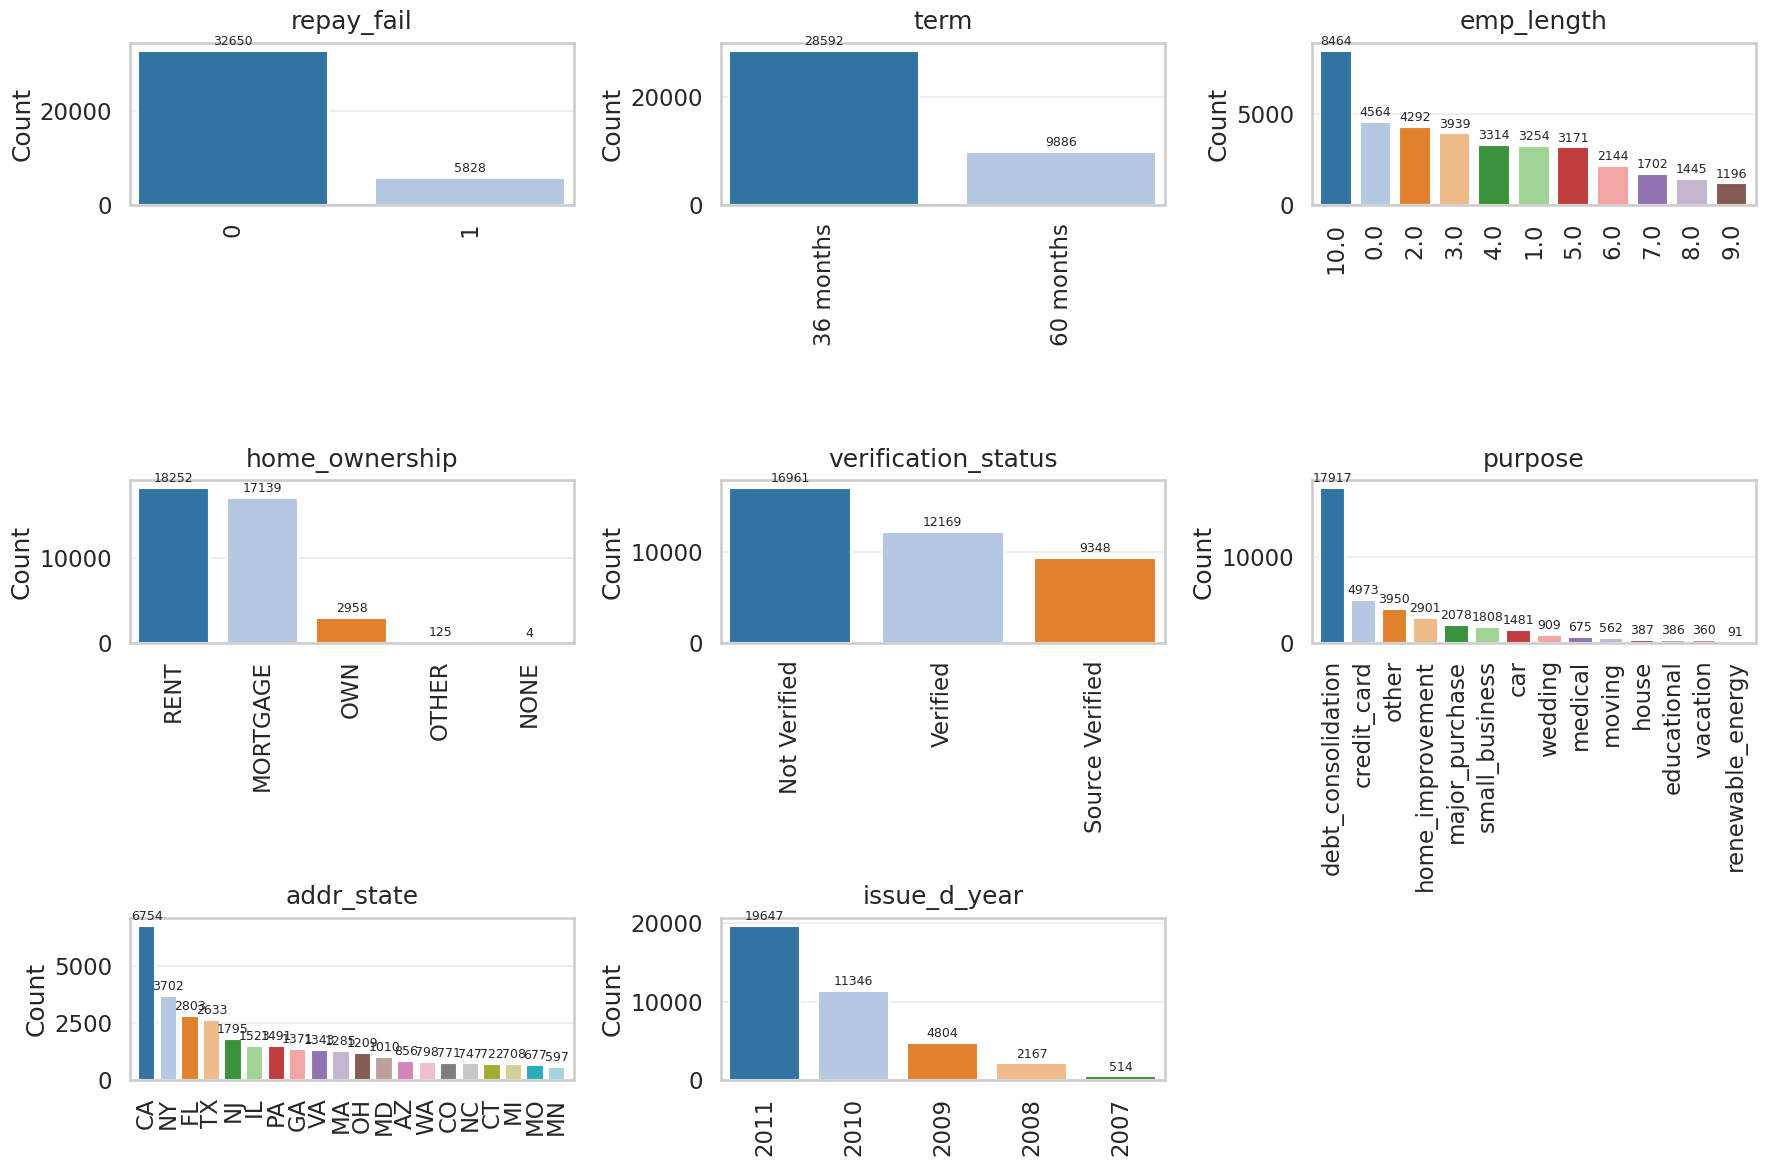

In [25]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", context="talk")  # clean background + bigger fonts
y_col          = ['repay_fail']
cat_cols1= y_col   + cat_cols + ['issue_d_year']
def plot_cats_pretty(df, cat_cols1, target=None, ncols=3, top_n=None):
    n = len(cat_cols1)
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 4*nrows))
    axes = np.array(axes).reshape(-1)  # flatten

    for ax, col in zip(axes, cat_cols1):
        # order by frequency; optionally keep only top_n categories
        order = df[col].value_counts().index
        if top_n:
            order = order[:top_n]
            d = df[df[col].isin(order)]
        else:
            d = df

        if target is None:
            # colorful per-category bars (like your 2nd image)
            pal = sns.color_palette("tab20", n_colors=len(order))
            sns.countplot(data=d, x=col, order=order, palette=pal, ax=ax)
        else:
            # keep hue with soft 2-color palette
            pal_hue = sns.color_palette("Set2", n_colors=d[target].nunique())
            sns.countplot(data=d, x=col, order=order, hue=target,
                          palette=pal_hue, dodge=True, ax=ax)

        ax.set_title(col, pad=10)
        ax.set_xlabel("")
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=90)
        ax.margins(x=0.02)
        ax.grid(axis='y', alpha=0.3)

        # Optional: show counts on bars (works when no hue)
        if target is None:
            for container in ax.containers:
                ax.bar_label(container, fmt='%d', padding=2, fontsize=9)

    # hide extra axes
    for ax in axes[len(cat_cols1):]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()

# --- use it ---
# colorful bars per category (no hue) – like the 2nd image
#cat_cols1 = ['term','emp_length','home_ownership','verification_status','purpose','addr_state','issue_year']
plot_cats_pretty(df, cat_cols1, target=None, ncols=3, top_n=20)

# or, if you want to keep the hue (2 soft colors, still readable)
# plot_cats_pretty(df, cat_cols, target='repay_fail', ncols=3, top_n=20)


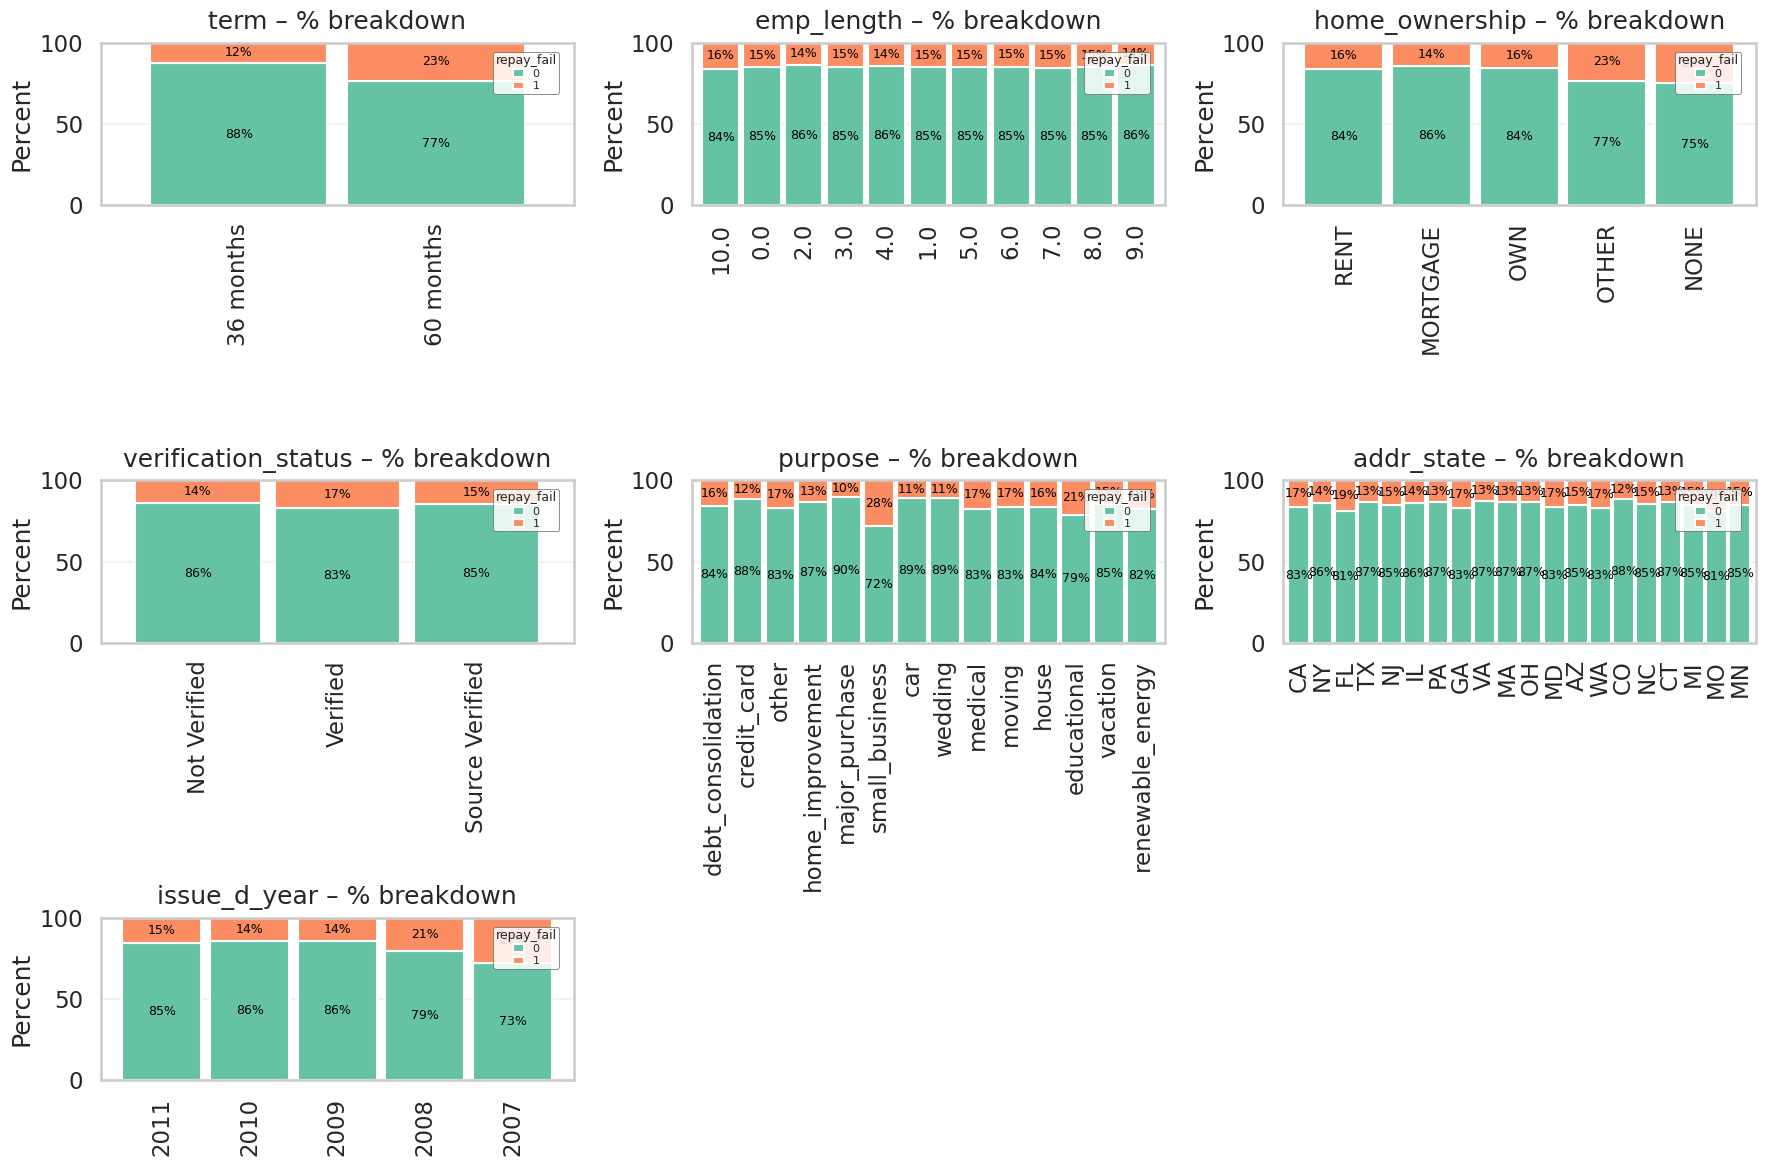

(<Figure size 1800x1200 with 9 Axes>,
 array([<Axes: title={'center': 'term – % breakdown'}, ylabel='Percent'>,
        <Axes: title={'center': 'emp_length – % breakdown'}, ylabel='Percent'>,
        <Axes: title={'center': 'home_ownership – % breakdown'}, ylabel='Percent'>,
        <Axes: title={'center': 'verification_status – % breakdown'}, ylabel='Percent'>,
        <Axes: title={'center': 'purpose – % breakdown'}, ylabel='Percent'>,
        <Axes: title={'center': 'addr_state – % breakdown'}, ylabel='Percent'>,
        <Axes: title={'center': 'issue_d_year – % breakdown'}, ylabel='Percent'>,
        <Axes: >, <Axes: >], dtype=object))

In [26]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# סטייל כללי נעים וקריא
sns.set_theme(style="whitegrid", context="talk")

def plot_cats_hue_percent(
    df,
    cat_cols,
    target='repay_fail',
    ncols=3,
    top_n=None,
    legend_outside=False  # אם תרצי למקם את המקרא מחוץ לגרף
):
    """
    מצייר גרפים מוערמים ל-100% (אחוזים) לכל עמודה קטגוריאלית,
    עם hue=target, ותיבת מקרא קטנה/קומפקטית.
    """
    n = len(cat_cols)
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 4*nrows))
    axes = np.array(axes).reshape(-1)

    hue_pal = sns.color_palette("Set2", n_colors=df[target].nunique())

    for ax, col in zip(axes, cat_cols):
        # סדר לפי שכיחות; אם top_n הוגדר – מצמצמים לקטגוריות הנפוצות
        order = df[col].value_counts().index
        if top_n:
            order = order[:top_n]
            d = df[df[col].isin(order)]
        else:
            d = df

        # טבלת אחוזים לכל קטגוריה (שורה מסתכמת ל-100)
        tab = (pd.crosstab(d[col], d[target], normalize='index') * 100.0)\
                .reindex(order).fillna(0)

        tab.plot(kind='bar', stacked=True, color=hue_pal, ax=ax, width=0.9)

        ax.set_title(f"{col} – % breakdown", pad=10)
        ax.set_xlabel("")
        ax.set_ylabel("Percent")
        ax.set_ylim(0, 100)
        ax.tick_params(axis='x', rotation=90)
        ax.grid(axis='y', alpha=0.25)

        # --- מקטינים את תיבת המקרא (legend) ---
        if legend_outside:
            # מחוץ לגרף (שמאל/ימין – לבחירתך)
            leg = ax.legend(
                title=target,
                bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.,
                fontsize=8, title_fontsize=9,
                framealpha=0.85, borderpad=0.2, labelspacing=0.2,
                handlelength=1.0, handleheight=0.7, markerscale=0.8
            )
        else:
            # בתוך הגרף – קומפקטי
            leg = ax.legend(
                title=target, loc="upper right", bbox_to_anchor=(0.98, 0.98),
                fontsize=8, title_fontsize=9,
                framealpha=0.85, borderpad=0.2, labelspacing=0.2,
                handlelength=1.0, handleheight=0.7, markerscale=0.8
            )

        # מסגרת דקה ונעימה
        leg.get_frame().set_linewidth(0.6)
        leg.get_frame().set_edgecolor("#666")

        # סימון אחוזים על המקטעים (אופציונלי)
        for c in ax.containers:
            ax.bar_label(c, fmt='%.0f%%', label_type='center',
                         fontsize=9, color='black')

    # הסתרת צירים ריקים אם יש יותר תאים ממספר הגרפים
    for ax in axes[len(cat_cols):]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()
    return fig, axes

# --- שימוש לדוגמה ---
cat_cols1 = ['term','emp_length','home_ownership','verification_status','purpose','addr_state','issue_d_year']
plot_cats_hue_percent(df,
     cat_cols1 , #=['term','emp_length','home_ownership','verification_status','purpose','addr_state'],
     target='repay_fail',
     ncols=3,
     top_n=20,             # אופציונלי: להציג רק את 20 הקטגוריות הנפוצות
     legend_outside=False  # True אם תרצי להוציא את המקרא החוצה
 )

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38478 entries, 1 to 38479
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        38478 non-null  int64   
 1   loan_amnt                 38478 non-null  Int64   
 2   funded_amnt               38478 non-null  Int64   
 3   funded_amnt_inv           38478 non-null  Int64   
 4   term                      38478 non-null  category
 5   int_rate                  38478 non-null  float64 
 6   installment               38478 non-null  Int64   
 7   emp_length                37485 non-null  category
 8   home_ownership            38478 non-null  category
 9   annual_inc                38477 non-null  Int64   
 10  verification_status       38478 non-null  category
 11  purpose                   38478 non-null  category
 12  addr_state                38478 non-null  category
 13  dti                       38478 non-null  float64 


**Correlations, Pairpolts**

# **chi_square** for categorical


In [37]:
print(df.isnull().sum()[df.isnull().any()])

emp_length                  993
annual_inc                    1
revol_bal                     3
revol_util                   59
last_pymnt_d_year            71
last_pymnt_d_month           71
last_credit_pull_d_year       3
last_credit_pull_d_month      3
dtype: int64


In [29]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact
from statsmodels.stats.multitest import multipletests

# ---- Cramér's V עם תיקון הטיה (Bergsma 2013 / correction of Bias) ----
def cramers_v_corrected(tab):
    """
    tab: pandas.DataFrame של טבלת שכיחויות (contingency)
    """
    chi2, p, dof, exp = chi2_contingency(tab, correction=False)
    n = tab.to_numpy().sum()
    r, k = tab.shape
    if n == 0 or min(r, k) == 1:
        return np.nan
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    denom = min((kcorr-1), (rcorr-1))
    return np.sqrt(phi2corr / denom) if denom > 0 else np.nan

# ---- בדיקת חי-בריבוע/פישר מול יעד בינארי על רשימת עמודות קטגוריאליות ----
def chi_square_vs_target(df, cat_cols, target='repay_fail', fdr=True, min_expected=5):
    """
    מריץ Chi-square (או Fisher ב-2x2 עם תאים צפויים קטנים) לכל עמודה ב-cat_cols מול היעד.
    מחזיר טבלת תוצאות כולל Cramér's V ו-p עם FDR.
    """
    rows = []
    for col in cat_cols:
        if col not in df.columns:
            continue
        d = df[[col, target]].dropna()
        if d.empty:
            rows.append({'feature': col, 'method': None, 'chi2': np.nan, 'dof': np.nan,
                         'p': np.nan, 'cramers_v': np.nan, 'n': 0})
            continue

        tab = pd.crosstab(d[col], d[target])
        n = tab.to_numpy().sum()
        # אם מימדי הטבלה הם 2x2 נבדוק ציפיות ונבחר Fisher אם צריך
        if tab.shape == (2, 2):
            chi2, p, dof, exp = chi2_contingency(tab, correction=False)
            use_fisher = (exp < min_expected).any()
            if use_fisher:
                # Fisher exact -> p בלבד; נוסיף cramér על בסיס chi2 (עם continuity=False) כקירוב
                _, p_f = fisher_exact(tab.values)  # דו-צדדי
                # לחישוב cramér נחשב בכל זאת chi2 (ללא תיקון) לשם אפקט; מקובל לדווח רק p של Fisher
                chi2_no_corr, _, dof_no_corr, _ = chi2_contingency(tab, correction=False)
                rows.append({'feature': col, 'method': 'Fisher (2x2)',
                             'chi2': chi2_no_corr, 'dof': dof_no_corr, 'p': p_f,
                             'cramers_v': cramers_v_corrected(tab), 'n': n})
            else:
                chi2, p, dof, exp = chi2_contingency(tab, correction=False)
                rows.append({'feature': col, 'method': 'Chi-square',
                         'chi2': chi2, 'dof': dof, 'p': p,
                         'cramers_v': cramers_v_corrected(tab), 'n': n})
        else:
            # לטבלאות גדולות יותר: Chi-square רגיל (ללא continuity correction)
            chi2, p, dof, exp = chi2_contingency(tab, correction=False)
            rows.append({'feature': col, 'method': 'Chi-square',
                         'chi2': chi2, 'dof': dof, 'p': p,
                         'cramers_v': cramers_v_corrected(tab), 'n': n})

    out = pd.DataFrame(rows).sort_values('p')
    if fdr and out['p'].notna().any():
        mask = out['p'].notna()
        out.loc[mask, 'p_fdr'] = multipletests(out.loc[mask, 'p'], method='fdr_bh')[1]
    return out

# ---- דוגמה לשימוש ----
years = sorted(df['issue_d_year'].dropna().unique())
df['issue_d_yearC'] = pd.Categorical(df['issue_d_year'], categories=years, ordered=True)
small_cat_cols = ['termC','home_ownershipC','verification_statusC','purposeC','emp_lengthC','addr_stateC','issue_d_yearC']
chi_tbl = chi_square_vs_target(df, small_cat_cols, target='repay_fail', fdr=True)
display(chi_tbl.head(10))

,feature,method,chi2,dof,p,cramers_v,n,p_fdr
0,termC,Chi-square,696.017840,1,2.196112e-153,0.134399,38478,1.537278e-152
3,purposeC,Chi-square,381.546472,13,1.755896e-73,0.097869,38478,6.145635e-73
6,issue_d_yearC,Chi-square,126.199802,4,2.528824e-26,0.056355,38478,5.900588e-26
5,addr_stateC,Chi-square,167.654321,49,6.819080e-15,0.055531,38478,1.193339e-14
2,verification_statusC,Chi-square,39.440800,2,2.726084e-09,0.031194,38478,3.816517e-09
1,home_ownershipC,Chi-square,23.594541,4,9.630036e-05,0.022567,38478,1.123504e-04
4,emp_lengthC,Chi-square,17.759794,10,5.915331e-02,0.014388,37485,5.915331e-02


All features except emp_length show statistically significant relationships with the target (repay_fail).

However, the strength of those relationships is generally weak.

The most informative variables among the categorical ones are:
 term (36 vs 60 months)
 purpose of the loan

Other features like state, verification status, home ownership add minor predictive value but may still be useful in combination with others or in tree-based models.

emp_length adds very little information on its own and might be optional or only useful with transformations/grouping.

All categorical features tested are statistically associated with repay_fail (very small p-values even after FDR correction).

However, the practical strength of these associations is modest: Cramér’s V values are small to small-medium.

Relative strength (by Cramér’s V):

term (~0.134) – strongest in this set, still small–medium; loan term relates to default risk.

purpose (~0.098) – small but meaningful association; loan purpose matters somewhat.

issue_year (~0.056) – small association, likely reflecting time/macro effects.

addr_state (~0.056) – small geographic effect.

verification_status (~0.031) – weak association.

home_ownership (~0.023) – weak association.

emp_length (~0.014) – very weak association.

CORELATION FOR **CONT**  default spearman

In [30]:
corr_matrix = df[cont_cols].corr()   #(method='spearman')
corr_matrix


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,pub_rec
loan_amnt,1.000000,0.981977,0.929412,0.290550,0.931332,0.276830,0.062977,-0.031796,-0.033562,0.177015,0.253121,0.065468,0.257125,0.884034,0.844892,0.849528,0.729628,0.446269,-0.052614
funded_amnt,0.981977,1.000000,0.947043,0.293300,0.956508,0.272942,0.062602,-0.032906,-0.032743,0.175589,0.249883,0.069291,0.251430,0.900014,0.860609,0.867266,0.736850,0.450756,-0.053709
funded_amnt_inv,0.929412,0.947043,1.000000,0.277605,0.889514,0.254165,0.068460,-0.044261,-0.078978,0.156336,0.211795,0.070244,0.240889,0.873568,0.914249,0.839136,0.726731,0.439308,-0.056908
int_rate,0.290550,0.293300,0.277605,1.000000,0.269966,0.055175,0.119601,0.155339,0.177838,0.026080,0.083864,0.459693,-0.030487,0.286329,0.274846,0.167466,0.510020,0.145009,0.099503
installment,0.931332,0.956508,0.889514,0.269966,1.000000,0.279379,0.052657,-0.019142,-0.013434,0.176568,0.264522,0.094962,0.234569,0.851702,0.801921,0.844539,0.634278,0.399216,-0.046857
annual_inc,0.276830,0.272942,0.254165,0.055175,0.279379,1.000000,-0.114811,0.024776,0.025525,0.167048,0.276650,0.021486,0.244014,0.260412,0.245362,0.261334,0.188577,0.139299,-0.016991
dti,0.062977,0.062602,0.068460,0.119601,0.052657,-0.114811,1.000000,-0.036430,0.015063,0.298884,0.194249,0.279246,0.240140,0.061173,0.066204,0.037769,0.104079,0.001335,-0.002166
delinq_2yrs,-0.031796,-0.032906,-0.044261,0.155339,-0.019142,0.024776,-0.036430,1.000000,0.021087,0.015852,-0.041238,-0.046269,0.070360,-0.023485,-0.033970,-0.038812,0.020244,-0.012988,0.011773
inq_last_6mths,-0.033562,-0.032743,-0.078978,0.177838,-0.013434,0.025525,0.015063,0.021087,1.000000,0.093185,0.008141,-0.040098,0.089711,-0.058498,-0.089349,-0.072449,-0.016153,-0.007570,0.060915
open_acc,0.177015,0.175589,0.156336,0.026080,0.176568,0.167048,0.298884,0.015852,0.093185,1.000000,0.258004,-0.078762,0.693670,0.160298,0.145668,0.157564,0.124648,0.075194,0.005322


1. Very strongly correlated pairs (almost duplicates):
Feature Pair	Correlation	Insight
loan_amnt – funded_amnt	~0.98	The amount requested and the amount funded are almost identical.
funded_amnt – funded_amnt_inv	~0.94	Also very similar → one of them may be redundant.
total_pymnt – total_pymnt_inv	~0.99	Nearly identical variables.
installment – loan_amnt	~0.93	Monthly installment depends heavily on loan amount.

✔ Conclusion: These features are highly collinear — they may cause multicollinearity issues in linear models (like Logistic Regression), and one of each pair can be removed.

✅ 2. Financial risk-related variables (moderate correlations):

int_rate (interest rate) and dti (debt-to-income) show some correlation with loan amount and payment features → these reflect borrower risk level.

These variables are especially relevant for modeling likelihood of default.

✅ 3. Variables with little to no correlation with others:
Feature	Observation
delinq_2yrs, inq_last_6mths, pub_rec	Very low correlations (~0) with most variables.

✔ Meaning: These features contain unique information that is not duplicated by other variables — useful for prediction.

✅ 4. Moderate correlations (still useful but not duplicates):
Feature	Correlated with…
annual_inc	Positively correlated with loan_amnt and installment — higher earners take larger loans.
revol_bal	Linked to revol_util — more revolving balance → higher credit utilization.
📌 Practical Conclusions:

✔ 1. Remove or combine highly correlated features (corr > 0.9)
To reduce redundancy and multicollinearity in linear models:

Keep only one of: loan_amnt, funded_amnt, funded_amnt_inv

Keep only one of: total_pymnt, total_pymnt_inv

✔ 2. Important variables for modeling default risk:
int_rate, dti, installment, revol_util, loan_amnt

✔ 3. Low-correlation but high-value features (good to keep):
delinq_2yrs, inq_last_6mths, pub_rec — they add new information to the model.

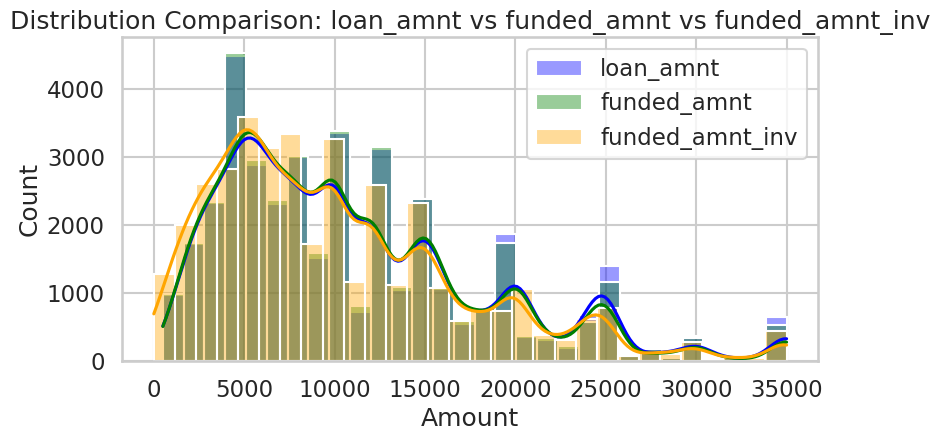

In [31]:
#the same....will get desition..
plt.figure(figsize=(8, 4))

sns.histplot(df['loan_amnt'], color='blue', kde=True, bins=30, label='loan_amnt', alpha=0.4)
sns.histplot(df['funded_amnt'], color='green', kde=True, bins=30, label='funded_amnt', alpha=0.4)
sns.histplot(df['funded_amnt_inv'], color='orange', kde=True, bins=30, label='funded_amnt_inv', alpha=0.4)

plt.title("Distribution Comparison: loan_amnt vs funded_amnt vs funded_amnt_inv")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.legend()
plt.show()


 Highest positive correlations
loan_amnt        funded_amnt        0.981977
total_pymnt      total_rec_prncp    0.971911
total_pymnt_inv  total_pymnt        0.964003
installment      funded_amnt        0.956508
funded_amnt_inv  funded_amnt        0.947043
total_rec_prncp  total_pymnt_inv    0.933427
installment      loan_amnt          0.931332
loan_amnt        funded_amnt_inv    0.929412
funded_amnt_inv  total_pymnt_inv    0.914249
total_pymnt      funded_amnt        0.900014
dtype: float64

 Highest Negative correlations
total_rec_prncp  repay_fail        -0.343519
repay_fail       total_pymnt       -0.247495
total_pymnt_inv  repay_fail        -0.245006
repay_fail       last_pymnt_amnt   -0.220315
dti              annual_inc        -0.114811
inq_last_6mths   total_pymnt_inv   -0.089349
funded_amnt_inv  inq_last_6mths    -0.078978
open_acc         revol_util        -0.078762
total_rec_prncp  inq_last_6mths    -0.072449
                 pub_rec           -0.066147
dtype: float64


<Axes: >

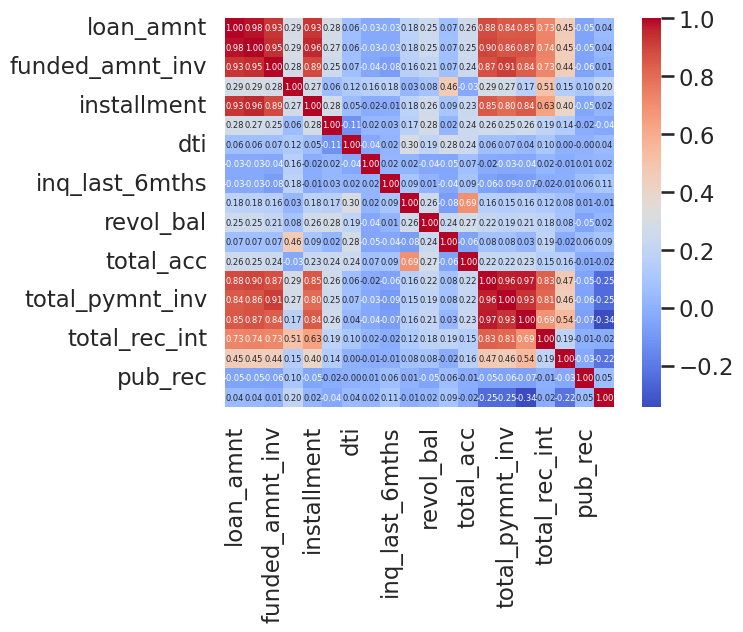

In [32]:
# calculating highest and lowest correlations
corr = df[cont_cols + y_col].corr() #(method='spearman')

# Unstack into pairs
corr_pairs = corr.unstack()

# Drop self-correlations
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Sort by correlation value
sorted_corr = corr_pairs.sort_values(ascending=False)

print()
print(f"{BG_BRIGHT_RED} Highest positive correlations{RESET}")
print(sorted_corr.head(20)[::2])
print()
print(f"{BG_BRIGHT_BLUE} Highest Negative correlations{RESET}")
print(sorted_corr.tail(20)[-1::-2])

sb.heatmap(corr, cbar = True,  square=True, annot=True, annot_kws={'size': 6}, fmt=".2f", cmap= 'coolwarm')

In [33]:
pair_plots = [y_col, cont_cols+y_col]

for plot in pair_plots:
  pp = sb.pairplot(df, vars=plot, height=3, aspect=1.1)
  pp.fig.subplots_adjust(wspace=0.15, hspace=0.15)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.